In [1]:
# Import storiks.plot
import storiks.plot as plot
import re
import pandas as pd
# Load default options
options = plot.Options()

## 1. System Setup

In [2]:
!cat setup.txt

Linux alangepc 5.11.0-38-generic #42~20.04.1-Ubuntu SMP Tue Sep 28 20:41:07 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux

Samsung 980 PRO 250GB (Over provision 30%)

Device         Boot     Start       End   Sectors  Size Id Type
/dev/nvme0n1p1           2048 341837823 341835776  163G 83 Linux
/dev/nvme0n1p2      341837824 488397167 146559344 69,9G  0 Empty

/dev/nvme0n1p1 on /media/auto/s980pro250oe type ext4 (rw,relatime)

Filesystem     Type      Size  Used Avail Use% Mounted on
/dev/nvme0n1p1 ext4      160G   87G   65G  58% /media/auto/s980pro250oe


## 2. Steady State Performance

### 2a. YCSB workloads A and B

File Name                      : Label
--------------------------------------------------
./exp_01-ycsb_workloada.out.xz : YCSB A
./exp_01-ycsb_workloadb.out.xz : YCSB B


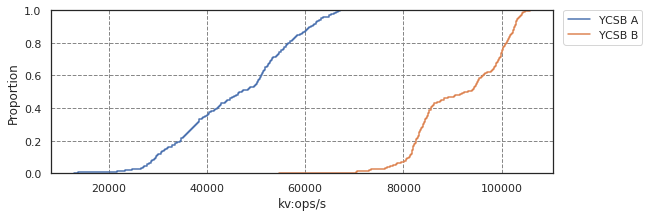

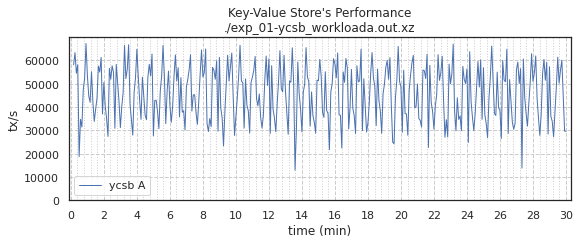

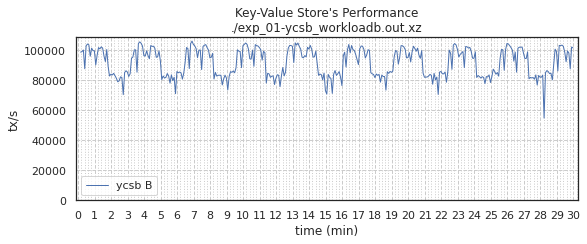

In [3]:
# Load steady-state experiment files (exp_01*)
af1_ycsb = plot.AllFiles(
    'exp_01-ycsb',
    options,
    plot.getFiles('.', str_filter='exp_01-ycsb'))
af1_ycsb.print_files()
# Plot the CDF of the database performance
af1_ycsb.graph_ecdf()
# Database telemetry
for f in af1_ycsb: f.graph_db()

### 2b. Access_time3 Executed Alone

#### iodepth2

File Name                           : Label
-------------------------------------------------------
./exp_01-iodepth2_ds0bs4wr00.out.xz : bs4,wr=0.0
./exp_01-iodepth2_ds0bs4wr01.out.xz : bs4,wr=0.1
./exp_01-iodepth2_ds0bs4wr05.out.xz : bs4,wr=0.5
./exp_01-iodepth2_ds0bs4wr09.out.xz : bs4,wr=0.9
./exp_01-iodepth2_ds0bs4wr10.out.xz : bs4,wr=1.0


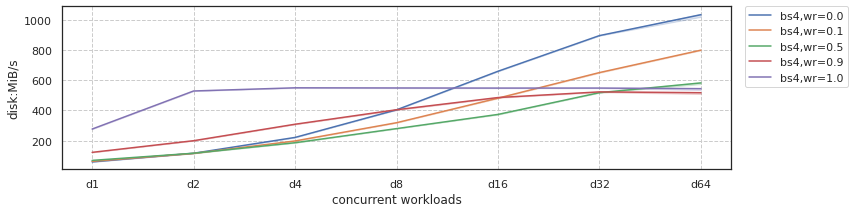

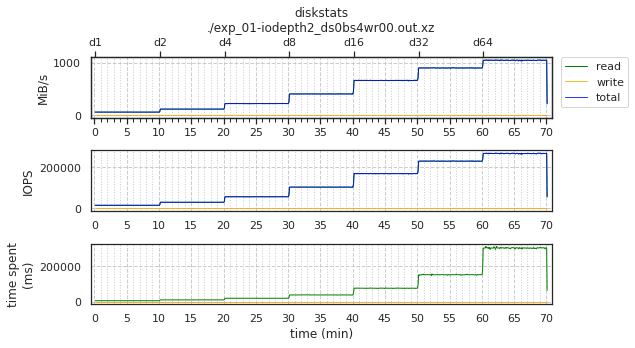

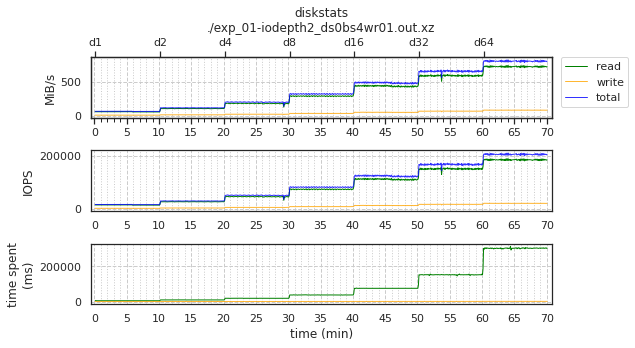

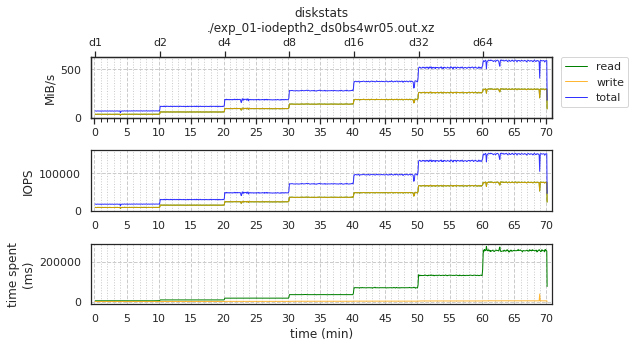

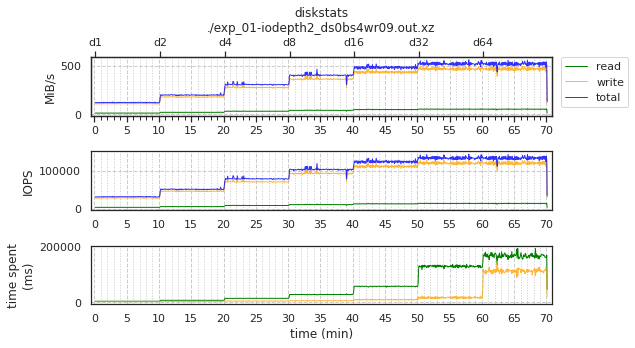

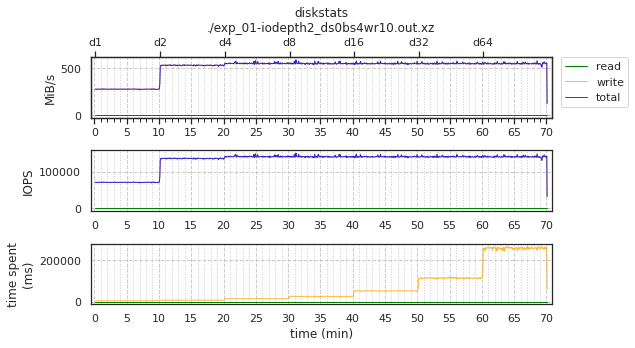

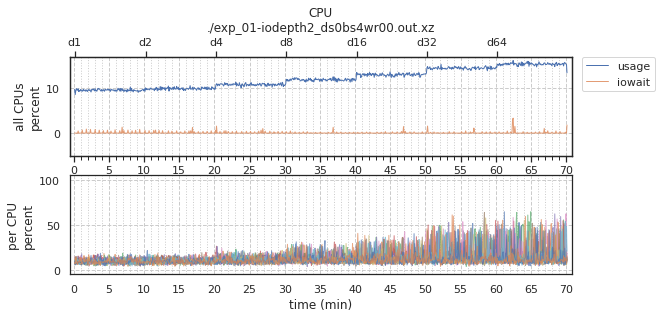

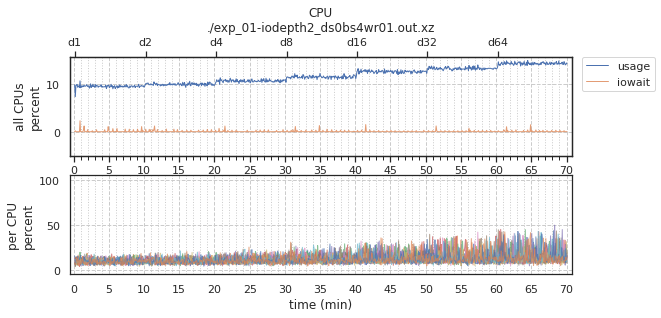

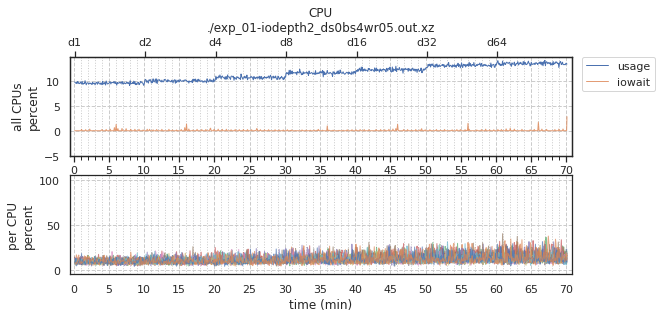

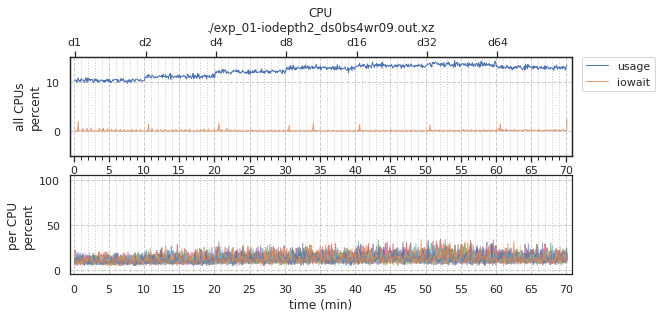

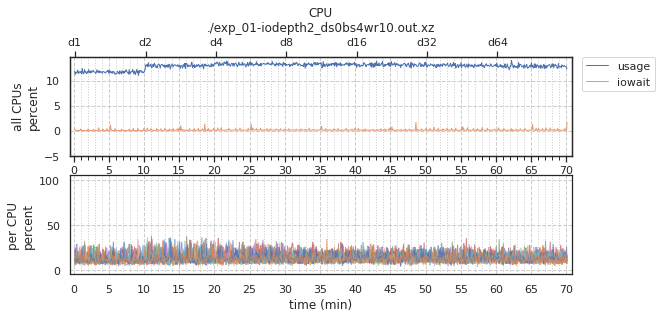

In [4]:
af1_at3ds0 = plot.AllFiles(
    'exp_01-iodepth2_ds0',
    options(w_labels=[f'd{i}' for i in (1,2,4,8,16,32,64)]),
    plot.getFiles('', str_filter='exp_01-iodepth2_ds0bs'))
af1_at3ds0.print_files()
af1_at3ds0.graph_io_w()
for f in af1_at3ds0: f.graph_io()
for f in af1_at3ds0: f.graph_cpu()

In [5]:
af1_at3ds0_data = None
for f in af1_at3ds0:
    df = f.pd_data.groupby(['w', 'w_name'], as_index=False).agg({'access_time3[0].total_MiB/s':'mean'})
    df = df.rename(columns={'access_time3[0].total_MiB/s':f'{f.file_label}(MiB/s)'})
    af1_at3ds0_data = df if af1_at3ds0_data is None else \
               pd.merge(af1_at3ds0_data, df, how='inner', on=['w', 'w_name'])
af1_at3ds0_data

,w,w_name,"bs4,wr=0.0(MiB/s)","bs4,wr=0.1(MiB/s)","bs4,wr=0.5(MiB/s)","bs4,wr=0.9(MiB/s)","bs4,wr=1.0(MiB/s)"
0,0,d1,58.420667,62.055583,68.242917,121.636500,276.073250
1,1,d2,115.605546,114.678571,115.874118,199.051261,529.329412
2,2,d4,220.619076,197.312689,185.547647,308.467311,550.394034
3,3,d8,403.615714,318.227311,279.163361,404.497647,549.470168
4,4,d16,659.878571,481.447983,373.427815,485.440084,548.689328
5,5,d32,896.961513,651.285798,518.043613,523.251597,548.630336
6,6,d64,1042.720763,800.519915,586.117458,521.063390,548.254237


File Name                           : Label
-------------------------------------------------------
./exp_01-iodepth2_ds1bs4wr00.out.xz : bs4,wr=0.0
./exp_01-iodepth2_ds1bs4wr01.out.xz : bs4,wr=0.1
./exp_01-iodepth2_ds1bs4wr05.out.xz : bs4,wr=0.5
./exp_01-iodepth2_ds1bs4wr09.out.xz : bs4,wr=0.9
./exp_01-iodepth2_ds1bs4wr10.out.xz : bs4,wr=1.0


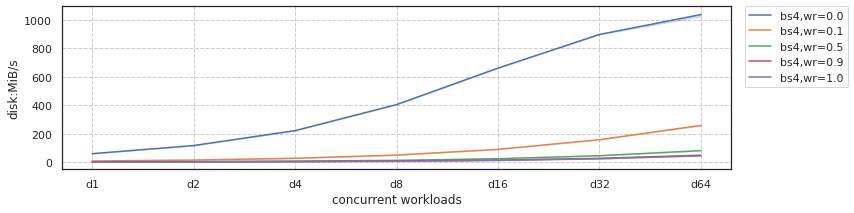

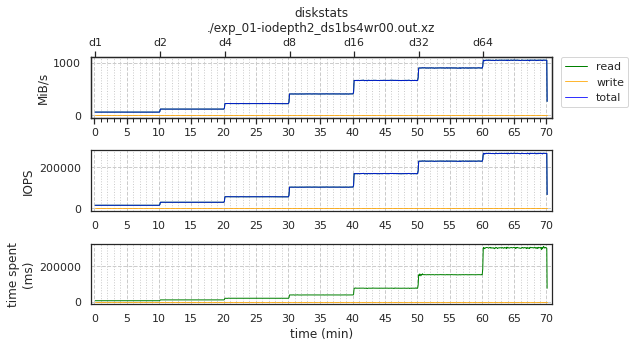

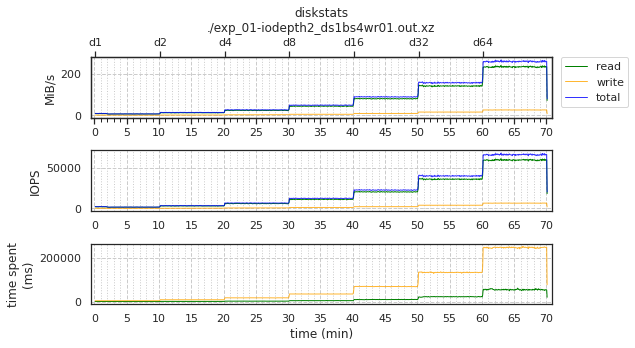

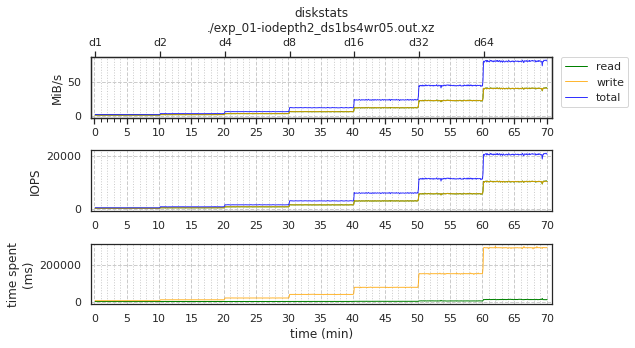

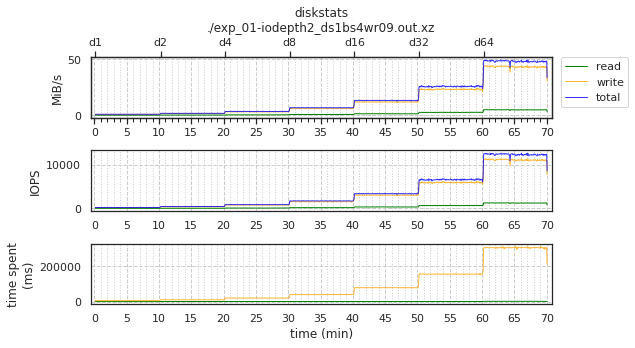

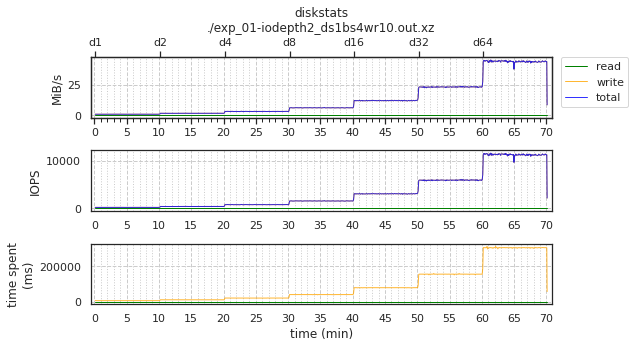

In [6]:
af1_at3ds1 = plot.AllFiles(
    'exp_01-iodepth2_ds1bs',
    options(w_labels=[f'd{i}' for i in (1,2,4,8,16,32,64)]),
    plot.getFiles('', str_filter='exp_01-iodepth2_ds1bs'))
af1_at3ds1.print_files()
af1_at3ds1.graph_io_w()
for f in af1_at3ds1: f.graph_io()
# for f in af1_at3ds1: f.graph_cpu()

In [7]:
af1_at3ds1_data = None
for f in af1_at3ds1:
    df = f.pd_data.groupby(['w', 'w_name'], as_index=False).agg({'access_time3[0].total_MiB/s':'mean'})
    df = df.rename(columns={'access_time3[0].total_MiB/s':f'{f.file_label}(MiB/s)'})
    af1_at3ds1_data = df if af1_at3ds1_data is None else \
               pd.merge(af1_at3ds1_data, df, how='inner', on=['w', 'w_name'])
af1_at3ds1_data

,w,w_name,"bs4,wr=0.0(MiB/s)","bs4,wr=0.1(MiB/s)","bs4,wr=0.5(MiB/s)","bs4,wr=0.9(MiB/s)","bs4,wr=1.0(MiB/s)"
0,0,d1,58.439750,7.242417,1.510750,0.855750,0.770917
1,1,d2,115.693950,13.680252,3.005042,1.701933,1.536555
2,2,d4,220.434370,26.262689,5.913109,3.397563,3.064286
3,3,d8,403.593697,48.685714,11.668403,6.697227,6.067815
4,4,d16,660.184454,88.821597,23.215378,13.124706,11.949916
5,5,d32,897.146975,156.732689,44.272269,25.628655,23.139412
6,6,d64,1043.537373,259.095932,80.087966,48.117542,44.056186


## 2. Pressure Scale (iodepth2)

* For each YCSB workload X in (A, B):
    * For write ratio (wr) from 0 to 1:
        * 1 YCSB workload X
        * 1 access_time3 with the specified wr increasing iodepth from 1 to 64 (d1 to d64).
          *(random ratio (rr) is 1 for all experiments)*

File Name                                          : Label
----------------------------------------------------------------------
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr00.out.xz : YCSB A; wr0.0
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr01.out.xz : YCSB A; wr0.1
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr05.out.xz : YCSB A; wr0.5
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr09.out.xz : YCSB A; wr0.9
./exp_02-ycsb_workloada-iodepth2_ds0bs4wr10.out.xz : YCSB A; wr1.0
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr00.out.xz : YCSB B; wr0.0
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr01.out.xz : YCSB B; wr0.1
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr05.out.xz : YCSB B; wr0.5
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr09.out.xz : YCSB B; wr0.9
./exp_02-ycsb_workloadb-iodepth2_ds0bs4wr10.out.xz : YCSB B; wr1.0


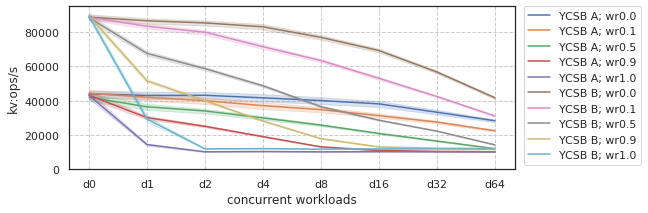

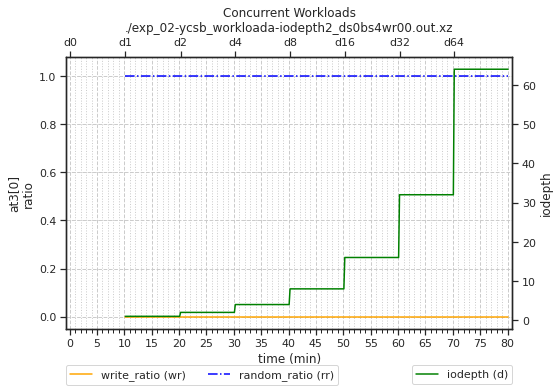

In [8]:
af2_ds0 = plot.AllFiles(
    'exp_02-ycsb-iodepth2_ds0',
    options(w_labels=['d0']+[f'd{i}' for i in (1,2,4,8,16,32,64)]),
    plot.getFiles('.', list_filter=['exp_02-ycsb', 'iodepth2_ds0']))
af2_ds0.print_files()
af2_ds0.graph_dbmean()
#af3.graph_pressure()
if len(af2_ds0) > 0: af2_ds0[0].graph_at3_script()

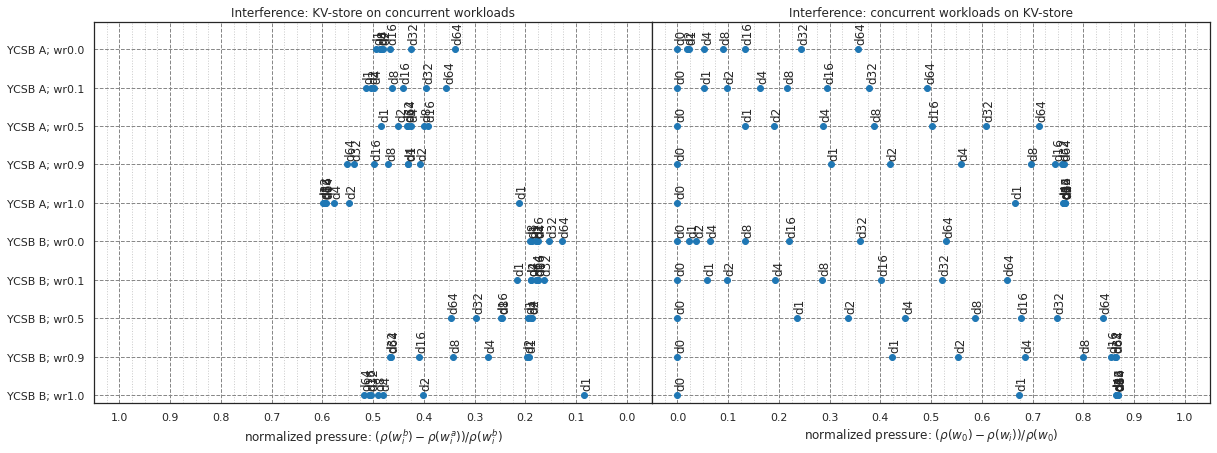

In [9]:
for f in af2_ds0:
    r = re.findall(r'iodepth2_([^.]+)\.out', f.filename)
    if len(r) > 0:
        for f2 in af1_at3ds0:
            r2 = re.findall(r'iodepth2_([^.]+)\.out', f2.filename)
            # print(r2)
            if len(r2) > 0 and r[0] == r2[0]:
                f.at3_steady_file = f2

af2_ds0.graph_join_pressure()

File Name                                          : Label
----------------------------------------------------------------------
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr00.out.xz : YCSB A; wr0.0
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr01.out.xz : YCSB A; wr0.1
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr05.out.xz : YCSB A; wr0.5
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr09.out.xz : YCSB A; wr0.9
./exp_02-ycsb_workloada-iodepth2_ds1bs4wr10.out.xz : YCSB A; wr1.0
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr00.out.xz : YCSB B; wr0.0
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr01.out.xz : YCSB B; wr0.1
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr05.out.xz : YCSB B; wr0.5
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr09.out.xz : YCSB B; wr0.9
./exp_02-ycsb_workloadb-iodepth2_ds1bs4wr10.out.xz : YCSB B; wr1.0


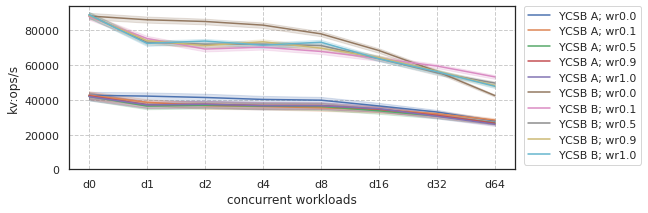

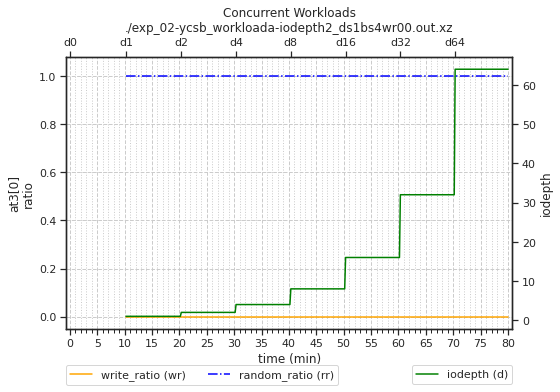

In [10]:
af2_ds1 = plot.AllFiles(
    'exp_02-ycsb-iodepth2_ds1',
    options(w_labels=['d0']+[f'd{i}' for i in (1,2,4,8,16,32,64)]),
    plot.getFiles('.', list_filter=['exp_02-ycsb', 'iodepth2_ds1']))
af2_ds1.print_files()
af2_ds1.graph_dbmean()
#af2_ds1.graph_pressure()
if len(af2_ds1) > 0: af2_ds1[0].graph_at3_script()

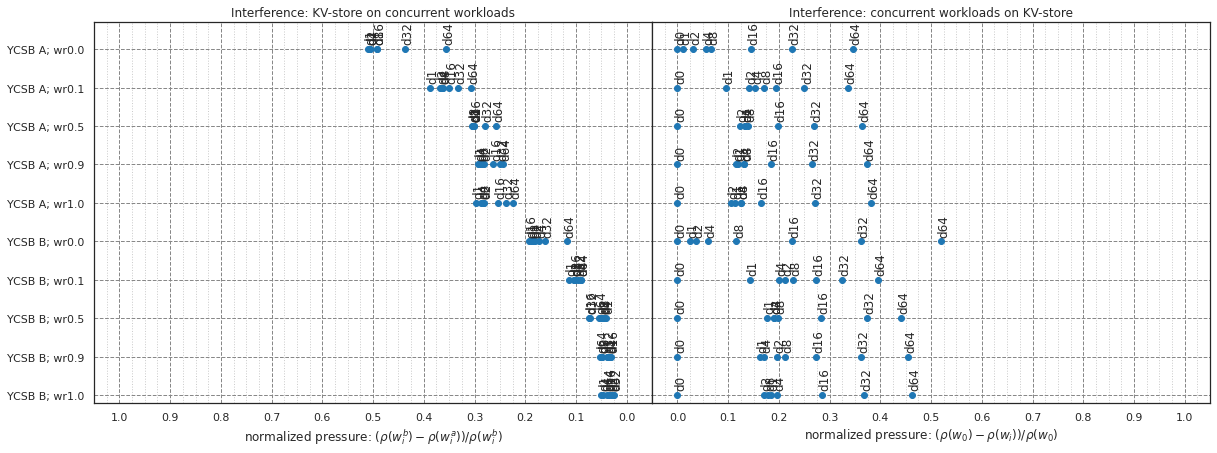

In [11]:
for f in af2_ds1:
    r = re.findall(r'iodepth2_([^.]+)\.out', f.filename)
    if len(r) > 0:
        for f2 in af1_at3ds1:
            r2 = re.findall(r'iodepth2_([^.]+)\.out', f2.filename)
            # print(r2)
            if len(r2) > 0 and r[0] == r2[0]:
                f.at3_steady_file = f2

af2_ds1.graph_join_pressure()

In [12]:
# for f in af2_ds0 + af2_ds1: f.graph_db()
# for f in af2_ds0 + af2_ds1: f.graph_pressure()
# for f in af2_ds0 + af2_ds1: f.graph_cpu()
# for f in af2_ds0: f.graph_io()
# for f in af2_ds1: f.graph_io()
# for f in af2_ds0 + af2_ds1: f.graph_db_summary()